In [3]:
import pandas as pd 
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv('potato.csv')
df.head()

,Date,Centre_Name,Commodity_Name,Price
0,25-11-1997,AGARTALA,Potato,4.5
1,26-11-1997,AGARTALA,Potato,4.5
2,27-11-1997,AGARTALA,Potato,4.5
3,28-11-1997,AGARTALA,Potato,4.5
4,01-12-1997,AGARTALA,Potato,4.5


In [43]:
df=df[df['Centre_Name']=='BENGALURU']

In [45]:
df['Date']=pd.to_datetime(df['Date'])
df['date_numeric'] = df['Date'].apply(lambda x: x.timestamp())
X=df[['date_numeric']]
y=df['Price']

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2092\158227027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']=pd.to_datetime(df['Date'])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2092\158227027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_numeric'] = df['Date'].apply(lambda x: x.timestamp())


In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [47]:
X_train.shape

(2529, 1)

In [48]:
X_test.shape

(1085, 1)

In [49]:
from sklearn.linear_model import LinearRegression

model=LinearRegression().fit(X_train,y_train)
print(model)

LinearRegression()


In [50]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [ 9.  8.  5. 10.  7. 19. 15. 13.  5.  5.]
Actual labels   :  15018     6.0
14889     6.0
14155     4.0
15394     8.0
14529     7.0
17215    17.0
16487     9.0
15910    15.0
14233     4.0
14257     6.0
Name: Price, dtype: float64


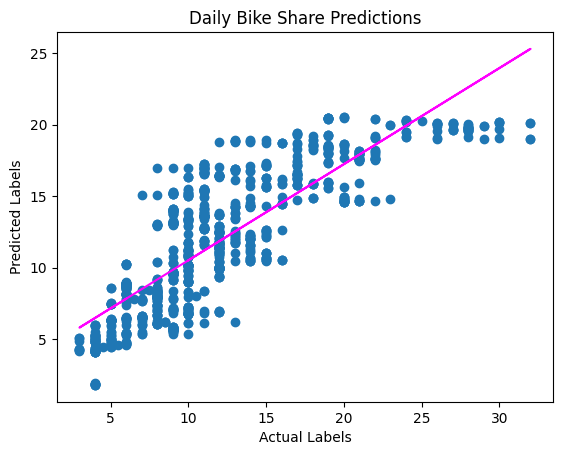

In [51]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [52]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 10.657133478483612
RMSE: 3.2645265320538615
R2: 0.6912877099678678
